# Random Fourier Features (RFFs)

In [1]:
%matplotlib inline
import numpy as np
import scipy
import scipy.linalg
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider, SelectionSlider, Dropdown

rcParams['figure.figsize'] = (10,5)
rcParams['font.size'] = 16

## Setup kernel function

In [2]:
class RBF:
    def __init__(self, sigma):
        self.sigma = sigma
        
    def __call__(self, delta):
        return np.exp(-np.abs(delta)**2/(2*self.sigma**2))
    
    def get_sigma(self):
        return self.sigma
    
    def sample_rffs(self, d):
        w = 1/self.get_sigma() * np.random.randn(d)
        b = 2*np.pi*np.random.rand(d)
        return w, b
    
class Laplacian:
    def __init__(self, sigma):
        self.sigma = sigma
        
    def __call__(self, delta):
        return np.exp(-np.abs(delta)/self.sigma)
    
    def get_sigma(self):
        return self.sigma
    
    def sample_rffs(self, d):
        w = 1/self.get_sigma() * np.random.standard_cauchy(d)
        b = 2*np.pi*np.random.rand(d)
        return w, b
    
k = RBF(sigma=1)

## Plot kernel

Text(0.5, 0, '$\\Delta$')

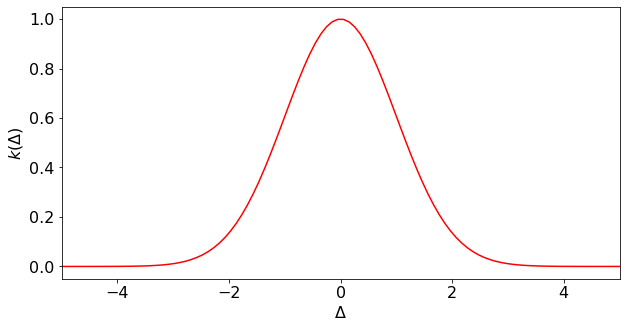

In [3]:
Delta = np.linspace(-5, 5, 100)
        
plt.plot(Delta, k(Delta), 'r-')
plt.xlim(-5,5)
plt.ylabel('$k(\Delta)$')
plt.xlabel('$\Delta$')

## Show approximation with RFFs

In [4]:
def rff(d, sigma, n_plot, kernel):
    Delta = np.linspace(-5, 5, 200)

    # plot kernel
    if kernel == 'RBF':
        k = RBF(sigma)
    elif kernel == 'Laplacian':
        k = Laplacian(sigma)
    else:
        raise ValueError("Invalid kernel.")
    plt.plot(Delta, k(Delta), 'r-')
    plt.ylabel('$k(\Delta)$')
    plt.xlabel('$\Delta$')
    
    # generate and plot approximation
    for _ in range(n_plot):
        w, b = k.sample_rffs(d)
        k_approx = np.zeros_like(Delta)
        for i, Y in zip(range(len(k_approx)), Delta):
            x = 0
            y = -Y
            zx = np.sqrt(2) / np.sqrt(d) * np.cos(w*x + b)
            zy = np.sqrt(2) / np.sqrt(d) * np.cos(w*y + b)
            k_approx[i] = np.dot(zx, zy)
        plt.plot(Delta, k_approx, 'b-', linewidth=0.5)
    
    plt.xlim(-5,5)
    plt.ylim(-0.2,1.3)

interact(rff, d=IntSlider(min=1, max=1000, steps=10), sigma=SelectionSlider(options=[("%g"%i,i) for i in np.linspace(0.1,1,10)], value=1), n_plot=IntSlider(min=1, max=100, steps=10, value=20), kernel=Dropdown(options=['RBF', 'Laplacian']));

interactive(children=(IntSlider(value=1, description='d', max=1000, min=1), SelectionSlider(description='sigma…